# Этап 1. Получение данных

# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Откройте файл с данными и изучите общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


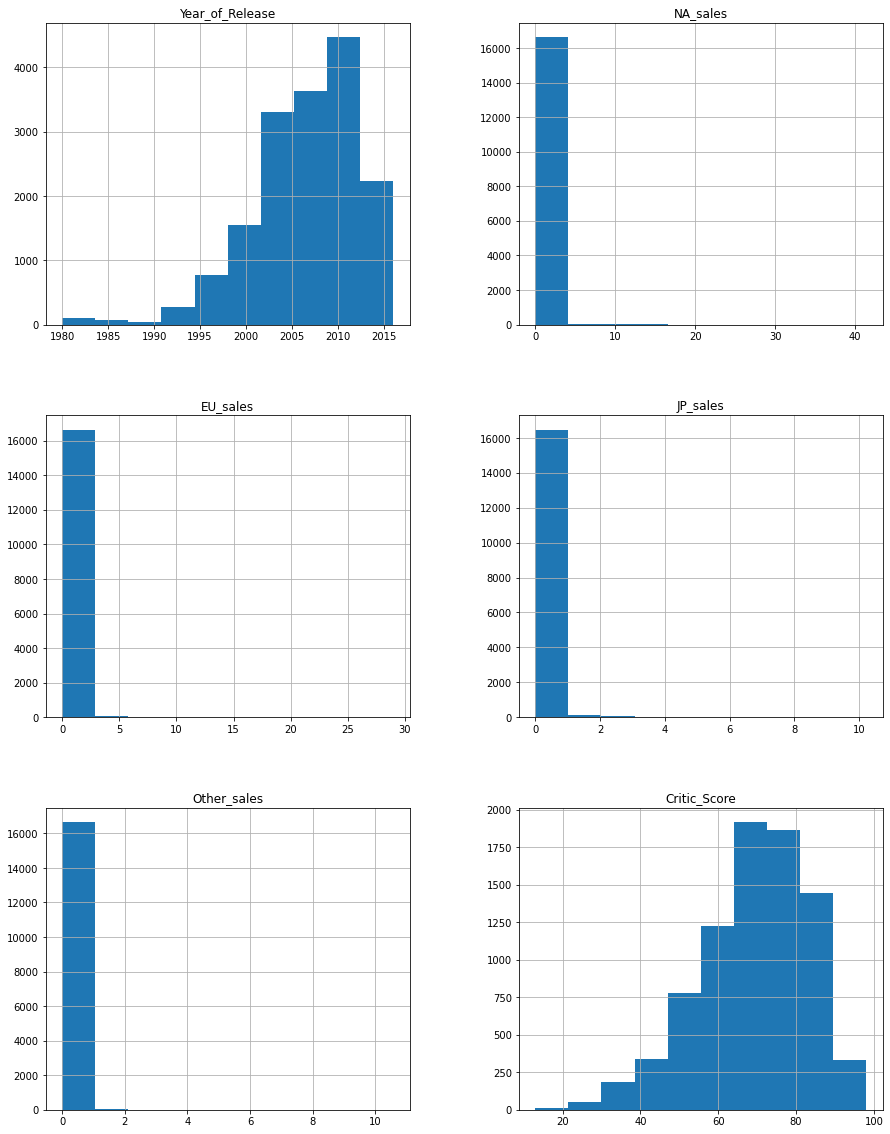

In [3]:
games = pd.read_csv('/datasets/games.csv')

games.head(10)

#выявляем типы данных
games.info()

games.hist(figsize=(15, 20))

games

In [4]:
games.isna().sum() 
# из всех столбцов, где можно заменить пропуски, это Year_of_Release и Name
# сделаем это ниже

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games.duplicated().sum()

# дубликатов нет, отлично!

0

# Этап 2. Подготовьте данные

In [6]:
#меняю названия столбцов
games.rename(columns={'Year_of_Release':'year', 'NA_sales':'na', 'JP_sales':'jp', 'EU_sales':'eu', 'Other_sales':'other'}, inplace=True)

In [7]:
games.columns = games.columns.str.lower()

In [8]:
games.info()
#нужно поменять типы данных:year, user_score, raiting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na            16715 non-null  float64
 5   eu            16715 non-null  float64
 6   jp            16715 non-null  float64
 7   other         16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
games['year'] = games['year'].fillna(0)
# заполняем пропущенные значения в столбце 'year' нулями
#games['year'] = games['year'].astype(int)
games[['year', 'critic_score']] = games[['year', 'critic_score']].astype('Int64')
#games['user_score'] = games['user_score'].astype('Int64')
games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение 'tbd' или to be determined = будет определено. Значит мы можем перевести это значение в nan

In [10]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'].unique()
games['user_score'] = games['user_score'].astype('float')


In [11]:
games[games['name'].isnull()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [12]:
games = games.dropna(subset = ['name'])

In [13]:
games.isnull().sum(axis=0).sort_values()

name               0
platform           0
year               0
genre              0
na                 0
eu                 0
jp                 0
other              0
rating          6764
critic_score    8576
user_score      9123
dtype: int64

In [14]:
games['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [15]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
# считаем суммы всех продаж
games['total_sales'] = games['na'] + games['eu'] + games['jp'] + games['other']
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

**Вывод:** получилось много пропусков в столбцах rating, critic_score, user_score. видимо, эти игры еще не получили оценку. Оставляем как есть.

# Этап 3. Проведите исследовательский анализ данных

In [17]:
# найдем максимальное значение
games['year'].max()

2016

In [18]:
# games['year'].min()

games[games['year'] > 1900]['year'].min()

1980

<AxesSubplot:>

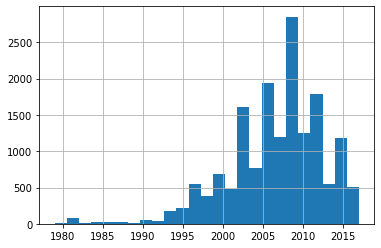

In [19]:
games['year'].hist(bins = 25, range=(1979, 2017))

<AxesSubplot:>

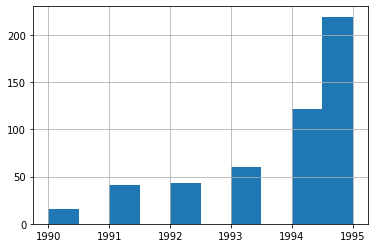

In [20]:
games['year'].hist(bins = 10, range=(1990, 1995))

Игры начали выпускаться с 1980. Данные до 1994 года не так сильно важны

<AxesSubplot:>

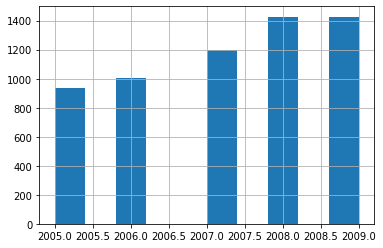

In [21]:
games['year'].hist(bins = 10, range=(2005, 2009))

Пожалуй самый важный период с 2005 по 2009 год. В этот промежуток времени выпускалось наибольшее количество игр

In [22]:
#top10_platforms = games['platform'].value_counts().head(10)
platforms_ascending = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
#top10_platforms = platforms_ascending.head(10).reset_index()
top10_platforms = platforms_ascending.reset_index()
iloc_top10_platforms = top10_platforms.iloc[0:10]
#top10_platforms_dict =top10_platforms.unique()
top10_platforms = iloc_top10_platforms['platform'].unique()
platforms_ascending

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<AxesSubplot:xlabel='platform'>

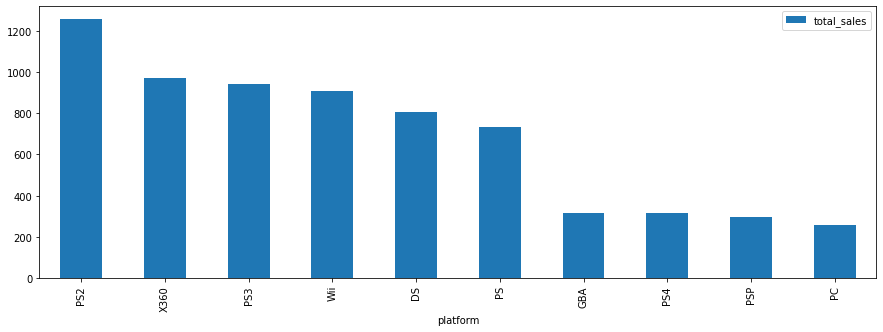

In [23]:
iloc_top10_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5))

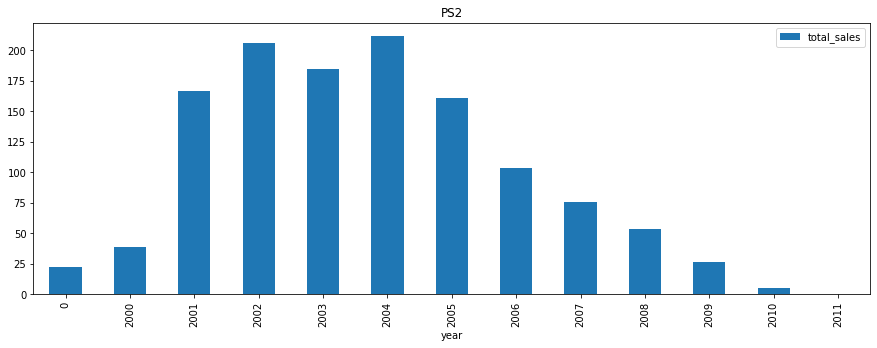

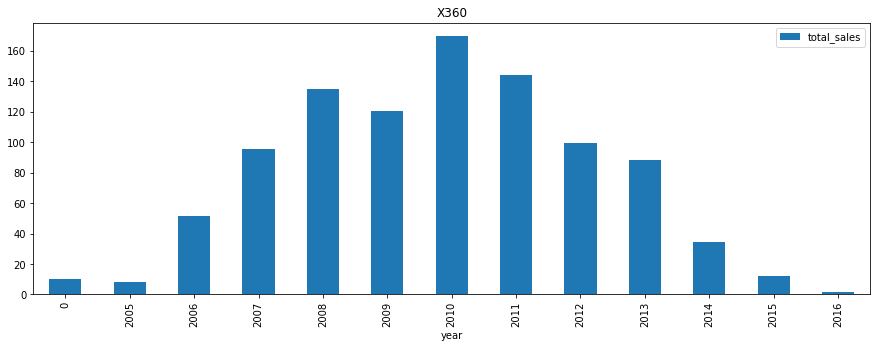

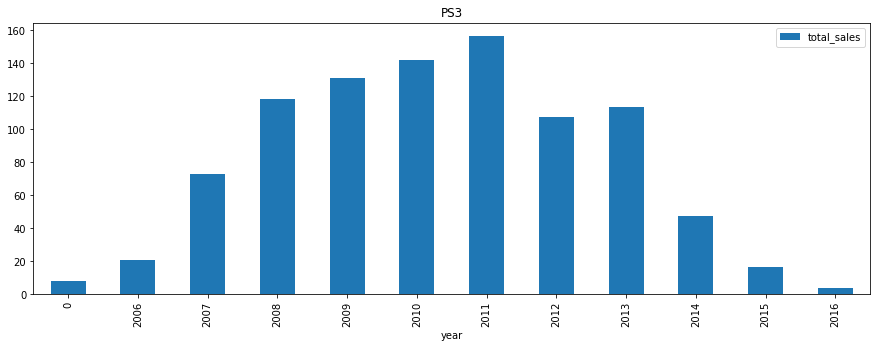

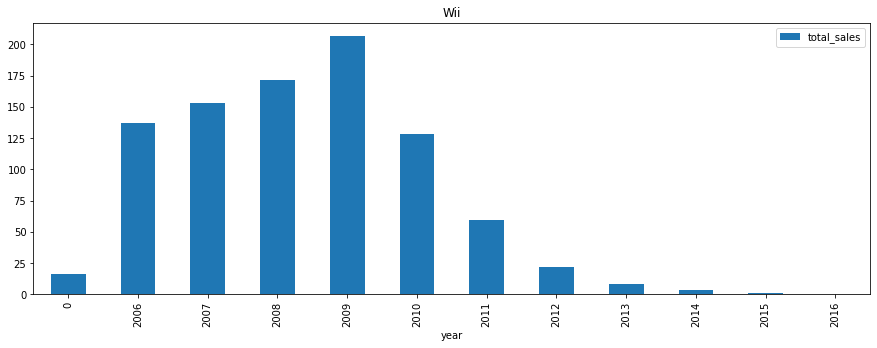

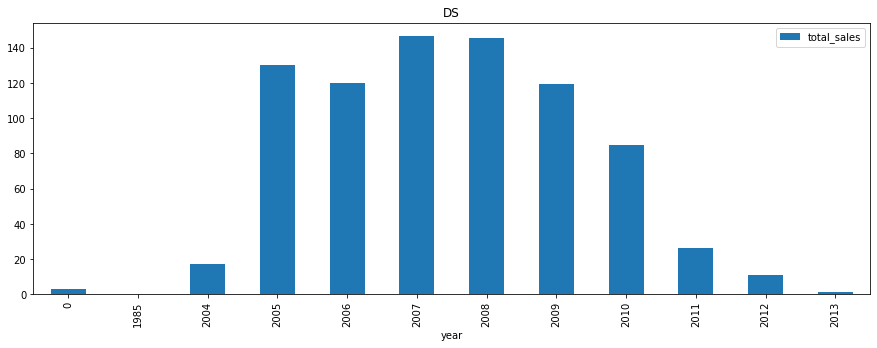

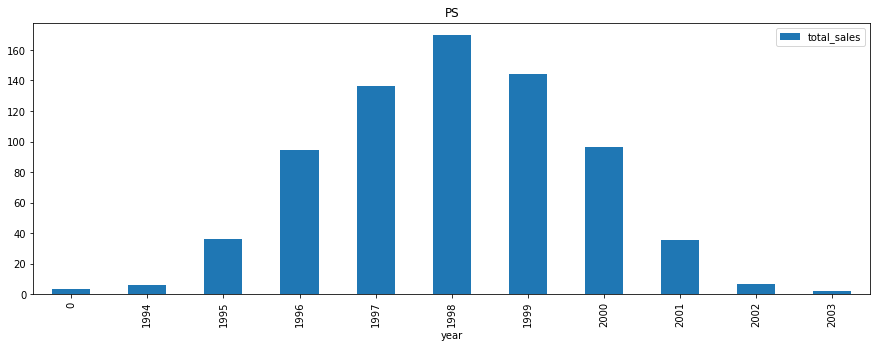

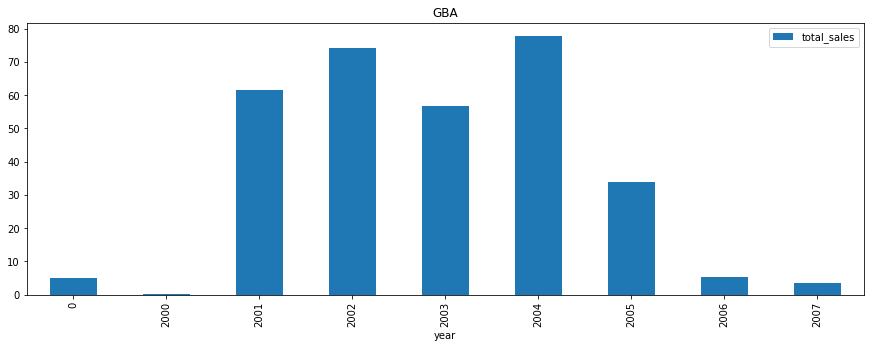

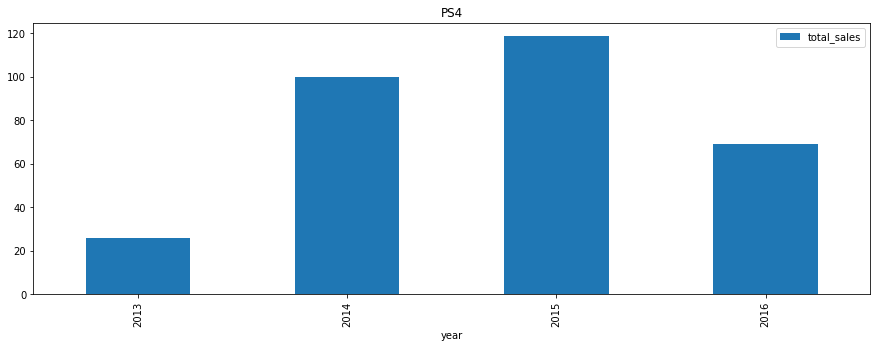

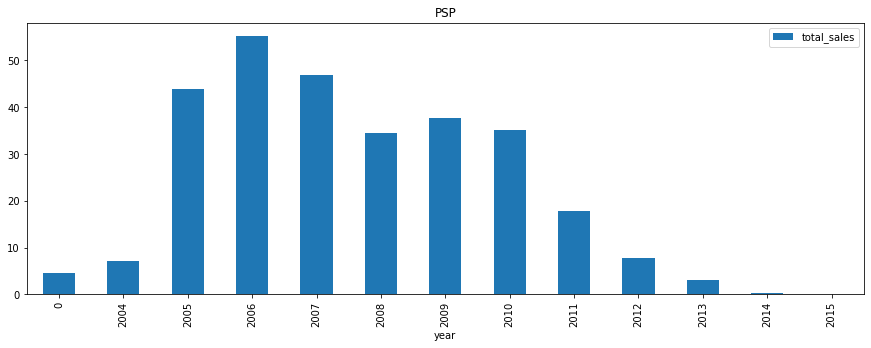

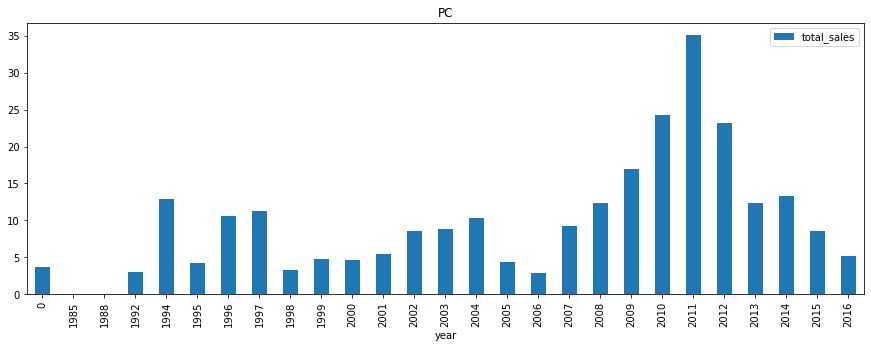

In [24]:
for platform in top10_platforms:
    games[games['platform'] == platform].pivot_table(index = 'year', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)


Вывод: В среднем платформа существует 10 лет. Большинство платформ появляется в начале 2000-x, особенно в 2006 году

Чем больше выборка, тем точнее результат, но прогноз нам нужно сделать на 2017 год. Соотвественно чем дальше мы отклоняемся, тем сильнее прогноз может быть искажет. По моему мнению актуальный период 2006 - 2016.

In [25]:
actual_data = games.query('year >= 2015') #возьмем все данные после 2015 года
#sns.catplot(x='platform')

Графики по количеству выпущенных игр за актуальный период на разных платформах

<AxesSubplot:xlabel='year'>

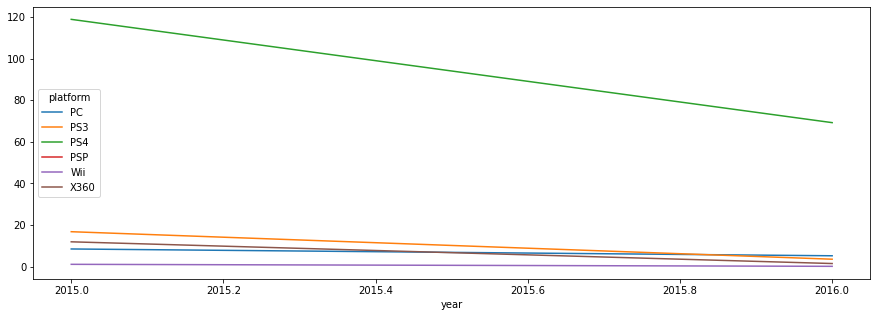

In [26]:
actual_data.query('platform in @top10_platforms').pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))

Все игры на платформах идут на снижение по продажам. Среди них игры на PS4 продаются гораздо чаще, скорее всего, потому что консоль появилась не так давно. PS4 является потенциально прибыльной, также PC, потому что показывает хоть небольшие, но стабильные продажи. падает сильнее всего спрос на консоли: X360, PS3. На остальные консоли уже давно упал спрос, либо вообще не продаются.

Итого потенциально прибыльные:

PC, PS4, XOne
Потенциально не будут продаваться:

X360, PS3

In [27]:
top5_platforms = actual_data['platform'].value_counts().head(5)
platforms_ascending = actual_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
#top5_platforms = platforms_ascending.head(5).reset_index()
top5_platforms = platforms_ascending.reset_index()
iloc_top5_platforms = top5_platforms.iloc[0:5]
#top5_platforms_dict =top5_platforms.unique()
top5_platforms = iloc_top5_platforms['platform'].unique()
platforms_ascending


,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


<AxesSubplot:>

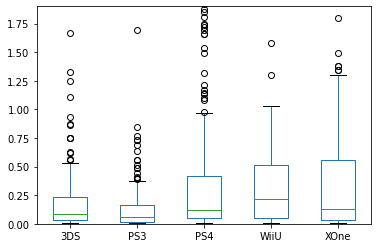

In [28]:
actual_data.query('platform in @top5_platforms').pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum'
                       ).plot(kind='box', ylim=(0,1.9))

На графике мы видем, что мы не учли консоли - XOne и 3DS. Добавим их в список потенциально прибыльных.

In [29]:
PSP_cor = PSP[['critic_score','user_score', 'total_sales']]
PSP_cor.corr()

NameError: name 'PSP' is not defined

По диаграмме видно, что в целом оценки критиков с оценками пользователей совпадают. По таблице можно сказать, что игровая аудитория прислушивается не только к критикам, но и к игрокам. PSP не самый удачный пример, потому что количество продаж не сильно зависит от оценок

In [33]:
XOne = actual_data.query('platform == "XOne"')
PS4 = actual_data.query('platform == "PS4"')
PC = actual_data.query('platform == "PC"')

In [34]:
PC_cor = PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.482804,0.377332
user_score,0.482804,1.000000,0.150381
total_sales,0.377332,0.150381,1.000000


In [35]:
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.533330,0.392849
user_score,0.533330,1.000000,-0.059738
total_sales,0.392849,-0.059738,1.000000


In [36]:
XOne_cor = XOne[['critic_score','user_score', 'total_sales']]
XOne_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.459443,0.430889
user_score,0.459443,1.000000,-0.041467
total_sales,0.430889,-0.041467,1.000000


По платформам PC, PS4, XOne однозначно можно сказать, что оценки критиков влияют на количество продаж, а оценки пользователей не принимают во внимание.

<AxesSubplot:>

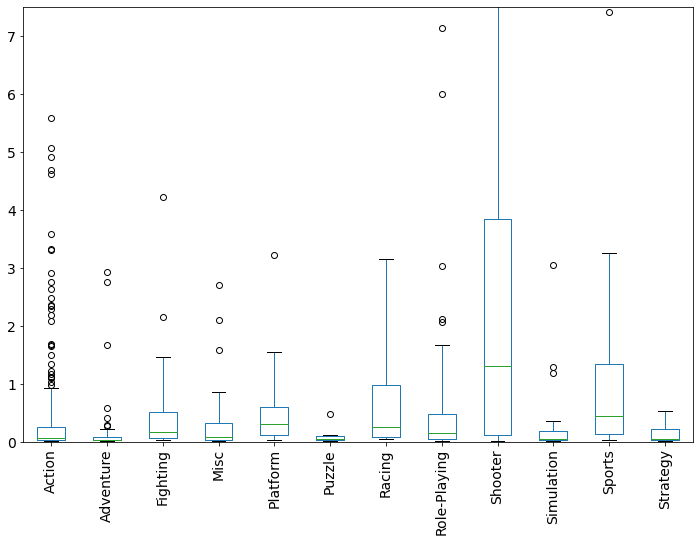

In [39]:
actual_data.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,7.5), figsize=(12,8), fontsize=14, rot=90, whis=3.0)


##### Смотрим самые популярные игровые жанры по продажам.

<AxesSubplot:ylabel='total_sales'>

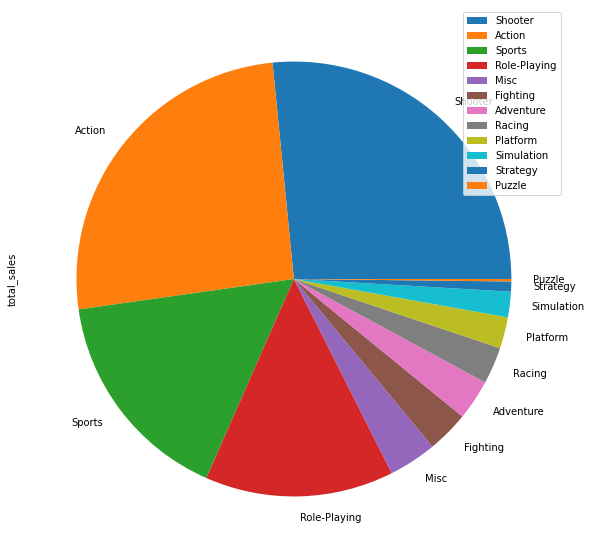

In [370]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales')

In [371]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Shooter,105.73
Action,102.13
Sports,64.33
Role-Playing,55.82
Misc,14.17
Fighting,12.37
Adventure,11.98
Racing,10.86
Platform,9.28


ВЫВОД:

Самые прибыльные жанры - Shooter, Action, Sports.

Наименее прибыльные жанры - Strategy, Puzzle

# Составьте портрет пользователя каждого региона

<AxesSubplot:xlabel='platform'>

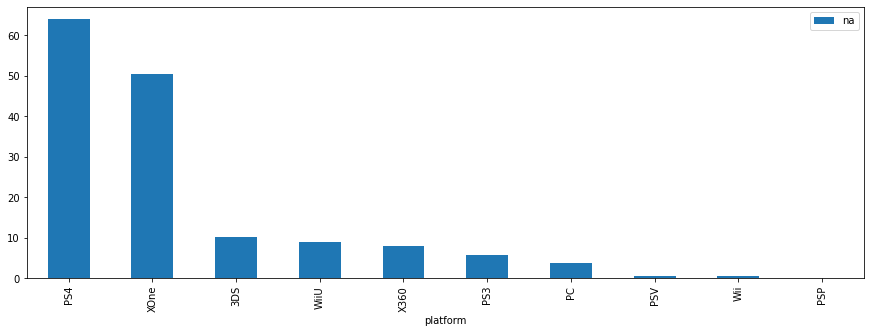

In [372]:
actual_data.pivot_table(index = 'platform', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(15,5))

Пользователи Северной Америки больше всего предпочитают PS4. На втором месте XOne.

<AxesSubplot:xlabel='platform'>

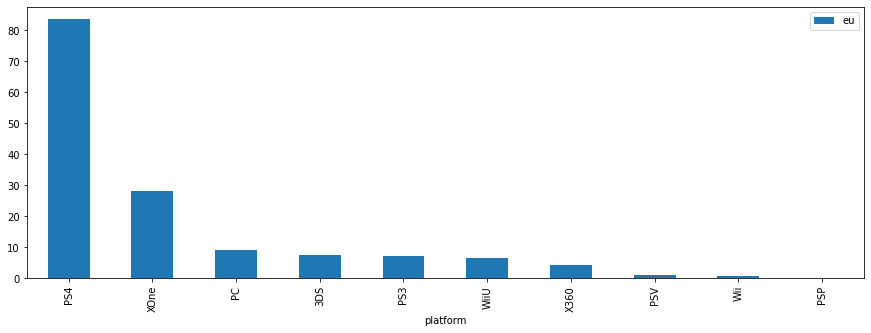

In [373]:
actual_data.pivot_table(index = 'platform', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(15,5))

Как и в Северной Америке в Европе лидирует PS4. На втором месте XOne.

<AxesSubplot:xlabel='platform'>

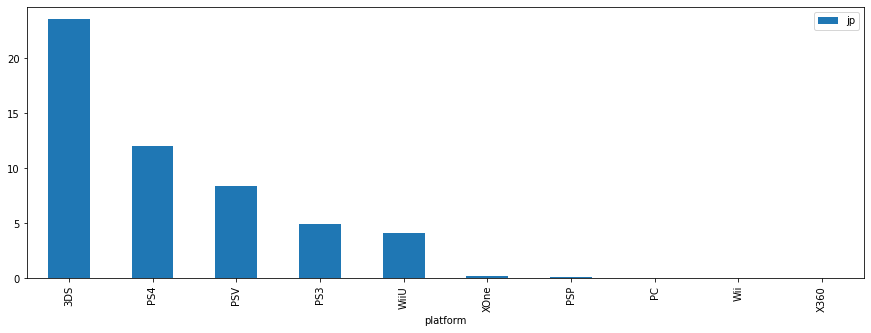

In [374]:
actual_data.pivot_table(index = 'platform', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(15,5))

Подавляющее большинство японских пользователей играют в японские платформы, что неудивительно из-за большого разнообразия платформ

#### Можно сделать общий вывод, что японские платформы лидеры по всему мира.

In [375]:

actual_data.pivot_table(index = 'genre', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na')

,na
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58
Fighting,5.54
Adventure,3.84
Platform,3.78
Racing,2.82


In [376]:
actual_data.pivot_table(index = 'genre', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu')

,eu
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52
Adventure,4.67
Misc,4.26
Simulation,3.74
Fighting,3.72


In [377]:
actual_data.pivot_table(index = 'genre', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp')

,jp
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22
Simulation,1.93
Sports,1.65
Fighting,1.54
Platform,1.42


ВЫВОД: Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и игровая индустрия больше развита в домашнем уюте, поэтому популярны жанры - Action, Sports, Shooter. В японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и редко играют в игры с жанром - shooter.

In [378]:
actual_data['region'] = actual_data['eu'] + actual_data['jp'] + actual_data['na']
actual_data['region']

31       12.25
77        7.30
87        6.70
94        6.49
99        6.71
         ...  
16699     0.01
16703     0.01
16710     0.01
16712     0.01
16714     0.01
Name: region, Length: 1108, dtype: float64

In [379]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu','jp','na'], aggfunc = 'sum')
ESRB

,eu,jp,na
rating,,,
E,34.83,5.25,26.59
E10+,11.54,3.27,17.87
M,45.54,4.29,47.03
T,20.32,7.70,22.86


Да, рейтинг влияет на продажи в отдельных регионах. Так, например, игры с рейтингом EC продавались в основном только в Северной Америке

# Этап 4. Проверьте гипотезы

1 гипотеза:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2 гипотеза:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [380]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.542148760330578
Средний пользовательский рейтинг платформы PC 6.29642857142857


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [381]:
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Вывод: 1 гипотеза подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [382]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.808290155440415
Средний пользовательский рейтинг жанра Sports 5.198780487804878


In [383]:
#проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Вывод: 2 гипотеза не подтвердилась. Средние пользовательские рейтинги жанров Action и Sports одинаковые.

# Общий вывод

Критерии определяющие успешность игры:

- Регион
- Рейтинг ассоциации, определяющей возрастной рейтинг компьютерных игр
- Платформа, которая наиболее распространена в данном регионе
- Жанр
- Рейтинг критиков (влияет на количество продаж во всех регионах)
Игры, которые будут продаваться в Северной Америке лучше всего:
- ESRB: E, M, T
- Платформ(в порядке убывания): PS4, Xbox One, 3DS
- Жанры: Action, Sports, Shooter, Misc, Role-Playing

Игры, которые будут продаваться в Европе лучше всего:
- ESRB: E, M, T
- Платформы: PS4, Xbox One, PC
- Жанры: Action, Sports, Shooter, Misc, Racing

Игры, которые будут продаваться в Японии лучше всего:
- ESRB: E, T, M
- Платформы: 3DS, PS4, PSV
- Жанры: Role-Playing, Action, Misc, Sports, Platform

*Рейтинги, жанры, платформы указаны в порядке убывания*